# Prediction of Gestational Weight Gain for Pregnancy: A Machine Learning-Based Multiclass Classification Approach.

#### Audencio Victor 

##### Dataset: Coorte-Araraquara

##### Objetivo da Análise: Identificação precoce de mulheres com maior risco de ganho de peso excessivo durante a gestação pode permitir intervenções precoces para prevenir complicações e promover um ganho de peso adequado

##### O Conjunto de dados possui 1455 observações, com as as seguintes variáveis listadas:

### O Conjunto de dados possui 1455 observações, com as as seguintes variáveis listadas:
 1. a_idade - Idade materna,
 2. a_estat1 - Altura, 
 3. a_pesopre - peso pregestational, 
 4. a_imcpg - IMC-pregest,  
 5. a_cor -Raca,((1) branca / (2) preta / (3) amarela / (4) indígena / (5) parda)  
 6. a_vigord -Actividade fisica 
 7. a_fumog - Fumar
 8. a_igadums -Idade gestacional em semanas,
 9. a_agdm -Diabetes 
 10. a_aghas -Hipertensao
 11. a_npari- Numero de gravidezes anterior 
 12. a_escola - Escolaridade  da gestante (em anos de estudos)
 13. a_civil - Estado civil  (1) casada  e solteira (com companheiro) / (2) solteira (sem companheiro) /separada/viúva
 14. a_hba1c - hemoglobina glicada, 
 15. a_hdl- HDL
 16. a_ldl-LDL
 17. a_ct - colestreol
 18. gpg - Ganho de peso gestacional 

### Roteiro:
1. Importação dos Pacotes
2. Chamada do Conjunto de Dados
3. Transformação das Variáveis
4. Separação em treino e teste - Split aplicado de 80%
5. Retirada de variáveis indesejadas
6. Correlação/Teste de dependência *_(novo)_*
7. Gráficos de frequências para X_train
8. One Hot Encoding
9. Treinamento do Primeiro Modelo (Entrega 2)
10. Obtenção das métricas com base no conjunto de teste (Entrega 2)
11. Treinando e comparando múltiplos algoritmos (Entrega 3)
12. Desenvolvendo algoritmo selecionado (Entrega 3)
    * Logistic Regression
    * LightGBM
    * Adaboost
13. Feature Selection - Boruta (Entrega 3)
14. Modelo de Regressão Logística com Boruta (Entrega 3)
15. LGBM com Boruta (Entrega 3)
16. Próximos passos

####  Importação dos Pacotes

In [13]:
!pip install catboost
!pip install pycaret
!pip install lazypredict
!pip install dfply
!pip install pyforest
!pip install boruta
!pip install dfply 
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz
!pip install dfply # utilizamos para ativar o 'pipe' no python, denotado por >>, além de algumas outras funções para manipulação dos dados
!pip install yellowbrick # visualização de gráficos para machine learning


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


##### Importação de bibliotecas

In [10]:
import sys
print(sys.executable)

C:\ProgramData\anaconda3\python.exe


In [11]:
!{sys.executable} -m pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [12]:
!pip install catboost

import catboost
import numpy as np # para processamento numérico de bancos de dados
from dfply import *  # para importar os comandos da biblioteca dfply
import matplotlib.pyplot as plt # para geração de gráficos
from matplotlib import rc  # configurações adicionais para os gráficos a serem gerados

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline   
import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# definimos o estilo dos gráficos
# mais estilos em https://matplotlib.org/3.1.1/gallery/#style-sheets
plt.style.use("fivethirtyeight") 
%config InlineBackend.figure_format = 'retina' # formato das imagens
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10}) #fonte utilizada
rc('mathtext',**{'default':'regular'})

import warnings   # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

import operator  # para ordenação do zip

np.random.seed(45)  # semente de aleatoriedade


Defaulting to user installation because normal site-packages is not writeable


ModuleNotFoundError: No module named 'catboost'

In [ ]:
import pandas as pd # para processamento de bancos de dados

#### Chamada do Conjunto de Dados

In [7]:
df = pd.read_csv("dadosML123")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info() # tomando informações sobre o tipo das variáveis parametrizadas na chamada

#### Transformação das Variáveis
O IOM (Institute of Medicine) publicou em 2009 e atualizou em 2019 suas recomendações para o ganho de peso durante a gestação com base no índice de massa corporal (IMC) pré-gestacional da mulher. Essas recomendações são baseadas em evidências e foram desenvolvidas para promover a saúde materna e fetal, reduzindo riscos à saúde associados ao ganho excessivo ou insuficiente de peso durante a gestação.

A classificação do ganho de peso gestacional segundo o IOM 2019, baseada no IMC pré-gestacional da mulher, é a seguinte:

IMC < 18,5 (baixo peso):
Ganho de peso recomendado: 12,5 a 18 kg.
IMC entre 18,5 e 24,9 (peso normal):

Ganho de peso recomendado: 11,5 a 16 kg.
IMC entre 25 e 29,9 (sobrepeso):

Ganho de peso recomendado: 7 a 11,5 kg.
IMC entre 30 e 34,9 (obesidade grau 1):

Ganho de peso recomendado: 5 a 9 kg.
IMC entre 35 e 39,9 (obesidade grau 2):

Ganho de peso recomendado: 4 a 7 kg.
IMC ≥ 40 (obesidade grau 3):

Ganho de peso recomendado: 3 a 6 kg.
É importante lembrar que essas recomendações são gerais e podem ser ajustadas de acordo com a situação individual de cada mulher, devendo sempre ser acompanhadas pelo médico obstetra.
###### Para este estudo teremoos  3 categorias: Abaixo, acima e dentro das recoendacoes.

In [8]:
# Instantiate a LabelEncoder object
le = LabelEncoder()

<IPython.core.display.Javascript object>

In [9]:
# Trans formando a variavel categoria (GPG) em target
df['target'] = le.fit_transform(df['categoria'])
df['target']

0       0
1       1
2       0
3       1
4       1
       ..
1637    0
1638    1
1639    1
1640    0
1641    1
Name: target, Length: 1642, dtype: int64

In [10]:
print(df)

      a_idade  a_imcga  b_imcga  c_imcga  a_imcpg  a_fmp  b_fmp  c_fmp  \
0       36.27    25.78    26.67    27.59    25.78   33.9   32.3   31.2   
1       18.83    17.35    19.26    20.92    17.35   21.2   25.5   28.8   
2       28.21    19.10    20.02    21.73    19.10   20.7   23.8   29.5   
3       26.80    31.43    34.65    36.42    31.43   36.2   40.5   39.2   
4       19.44    25.09    26.22    27.89    25.09   30.6   34.4   34.2   
...       ...      ...      ...      ...      ...    ...    ...    ...   
1637    36.51    24.06    25.07      NaN    24.49   32.8   33.7    NaN   
1638    24.86    23.58    25.27    28.04    23.25   31.1   31.3   35.3   
1639    21.91    37.39    38.33    38.79    36.81   42.7   45.3   45.6   
1640    26.58    24.90    25.16    26.13    27.91   35.4   35.1   35.8   
1641    25.04    21.48    23.47      NaN    23.39   25.6   26.2    NaN   

      a_igusg  b_igusg  ...  d_InPond  d_perintg  d_IntercRN  d_IGUSGrn    id  \
0       10.71    23.71  ...   

In [12]:
#Apagando variaveis do dataset 
df.drop(["gpg" , 'imc', "categoria", "d_PesoParto",'gpg','categoria1','c_agdm','c_imcga',
         #"a_agdm",'b_agdm', "a_hba1c",'a_insul','a_homa','f_FMP'
         ], axis=1, inplace=True)
 

In [13]:
df.head()

,a_idade,a_imcga,b_imcga,c_imcga,a_imcpg,a_fmp,b_fmp,c_fmp,a_igusg,b_igusg,...,d_intergr,d_SexoRN,a_estat1,a_pesopre,d_InPond,d_perintg,d_IntercRN,d_IGUSGrn,id,target
0,36.27,25.78,26.67,27.59,25.78,33.9,32.3,31.2,10.71,23.71,...,2.0,1.0,165.0,70.2,2.72,NaN,0.0,270.0,1,0
1,18.83,17.35,19.26,20.92,17.35,21.2,25.5,28.8,12.00,24.86,...,2.0,1.0,163.5,46.4,2.46,NaN,0.0,268.0,2,1
2,28.21,19.10,20.02,21.73,19.10,20.7,23.8,29.5,16.57,27.57,...,1.0,0.0,180.0,61.9,2.38,NaN,0.0,284.0,3,0
3,26.80,31.43,34.65,36.42,31.43,36.2,40.5,39.2,13.43,25.14,...,2.0,1.0,161.5,82.0,2.99,NaN,0.0,256.0,4,1
4,19.44,25.09,26.22,27.89,25.09,30.6,34.4,34.2,13.71,26.57,...,NaN,1.0,167.0,70.0,2.80,NaN,0.0,280.0,5,1


In [14]:
# Para as variáveis categóricas iremos criar dummies/ One hotencode
df= pd.get_dummies(df, columns=['a_fumog', 'a_agdm','b_agdm','a_aghas','a_civil', 'a_cor'])

In [15]:
df.tail()

,a_idade,a_imcga,b_imcga,c_imcga,a_imcpg,a_fmp,b_fmp,c_fmp,a_igusg,b_igusg,...,a_aghas_1,a_civil_1,a_civil_2,a_civil_3,a_civil_4,a_cor_1,a_cor_2,a_cor_3,a_cor_4,a_cor_5
1637,36.51,24.06,25.07,NaN,24.49,32.8,33.7,NaN,13.71,21.14,...,0,0,0,0,1,1,0,0,0,0
1638,24.86,23.58,25.27,28.04,23.25,31.1,31.3,35.3,12.71,22.43,...,0,0,0,1,0,0,0,0,0,1
1639,21.91,37.39,38.33,38.79,36.81,42.7,45.3,45.6,15.29,24.71,...,0,0,1,0,0,0,1,0,0,0
1640,26.58,24.90,25.16,26.13,27.91,35.4,35.1,35.8,13.86,21.43,...,0,0,0,0,1,1,0,0,0,0
1641,25.04,21.48,23.47,NaN,23.39,25.6,26.2,NaN,14.71,22.00,...,0,1,0,0,0,0,0,0,0,1


In [9]:
df.isna()
df.isna().sum()

a_idade           0
a_cor             0
a_civil           0
a_rendpcr        12
a_escola          1
a_fumog           0
a_alcool          0
a_ngesta          0
a_npcomo          0
a_estat1          0
a_circbracm      27
a_pesopre         0
d_PesoParto       0
a_fmp            30
a_vigorh       1320
a_moderh        858
d_IGUSGrn        32
a_pcr           197
a_homa          200
a_hb            197
a_hba1c         201
a_insul         196
a_tg            196
a_ct            196
a_hdl           196
a_ldl           196
a_agdm            0
b_agdm          111
c_agdm          227
a_aghas           0
a_agui            0
a_agsif           0
a_agceva          0
f_FMP          1188
f_FFMp         1188
imc               0
gpg               0
categoria1        0
categoria         0
cat_imc           0
target            0
dtype: int64

In [13]:
##imputar dados pela media dsa variavel (Separar entre treino e teste)
df.fillna(df.mean(), inplace=True)

#### Correlação/Teste de dependência

In [16]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Separação entre treino e teste

In [17]:
variaveis_preditoras = df.iloc[:, df.columns != 'target']
classe = df.iloc[:, df.columns == 'target']
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras, 
                                                    classe,
                                                    train_size = 0.80,
                                                    random_state = 45)

<IPython.core.display.Javascript object>

In [18]:
X_train.shape

(1313, 100)

In [19]:
X_test.shape

(329, 100)

In [20]:
 X_test.columns

Index(['a_idade', 'a_imcga', 'b_imcga', 'c_imcga', 'a_imcpg', 'a_fmp', 'b_fmp',
       'c_fmp', 'a_igusg', 'b_igusg', 'c_igusg', 'a_escola', 'a_npari',
       'a_npcomo', 'a_rendpcr', 'a_vigorh', 'b_vigorh', 'c_vigorh', 'a_moderh',
       'b_moderh', 'c_moderh', 'b_fumog', 'c_fumog', 'a_alcool', 'b_alcool',
       'c_alcool', 'c_agdm', 'b_aghas', 'c_aghas', 'a_agui', 'b_agui',
       'c_agui', 'a_agceva', 'b_agceva', 'c_agceva', 'a_pcr', 'b_pcr', 'c_pcr',
       'a_hb', 'b_hb', 'c_hb', 'a_hba1c', 'b_hba1c', 'c_hba1c', 'a_insul',
       'b_insul', 'c_insul', 'a_ct', 'b_ct', 'c_ct', 'a_hdl', 'b_hdl', 'c_hdl',
       'a_ldl', 'b_ldl', 'c_ldl', 'a_tg', 'b_tg', 'c_tg', 'a_tipoparto',
       'b_tsausg', 'c_tsausg', 'b_ttsbusg', 'c_ttsbusg', 'b_ttscusg',
       'c_ttscusg', 'a_pesousg', 'b_pesousg', 'c_pesousg', 'f_FMP', 'f_FFMp',
       'd_Apgar5', 'd_CompNasc', 'd_PesoNasc', 'd_intergr', 'd_SexoRN',
       'a_estat1', 'a_pesopre', 'd_InPond', 'd_perintg', 'd_IntercRN',
       'd_IGUSGrn', '

In [21]:
X_train.columns

Index(['a_idade', 'a_imcga', 'b_imcga', 'c_imcga', 'a_imcpg', 'a_fmp', 'b_fmp',
       'c_fmp', 'a_igusg', 'b_igusg', 'c_igusg', 'a_escola', 'a_npari',
       'a_npcomo', 'a_rendpcr', 'a_vigorh', 'b_vigorh', 'c_vigorh', 'a_moderh',
       'b_moderh', 'c_moderh', 'b_fumog', 'c_fumog', 'a_alcool', 'b_alcool',
       'c_alcool', 'c_agdm', 'b_aghas', 'c_aghas', 'a_agui', 'b_agui',
       'c_agui', 'a_agceva', 'b_agceva', 'c_agceva', 'a_pcr', 'b_pcr', 'c_pcr',
       'a_hb', 'b_hb', 'c_hb', 'a_hba1c', 'b_hba1c', 'c_hba1c', 'a_insul',
       'b_insul', 'c_insul', 'a_ct', 'b_ct', 'c_ct', 'a_hdl', 'b_hdl', 'c_hdl',
       'a_ldl', 'b_ldl', 'c_ldl', 'a_tg', 'b_tg', 'c_tg', 'a_tipoparto',
       'b_tsausg', 'c_tsausg', 'b_ttsbusg', 'c_ttsbusg', 'b_ttscusg',
       'c_ttscusg', 'a_pesousg', 'b_pesousg', 'c_pesousg', 'f_FMP', 'f_FFMp',
       'd_Apgar5', 'd_CompNasc', 'd_PesoNasc', 'd_intergr', 'd_SexoRN',
       'a_estat1', 'a_pesopre', 'd_InPond', 'd_perintg', 'd_IntercRN',
       'd_IGUSGrn', '

In [22]:
# Standarscaler com passthrough tem um problema de ordenação das colunas. Quando aplicamos, ele fornce o resultado com as colunas padronizadas em primeiro, seguidas das demais colunas.
# Para resolver este problema, iremos ordenar as nossas colunas alocando as contínuas nas primeiras posições 

X_train = X_train.loc[:,['a_rendpcr', 'a_alcool', 'a_ngesta', 'a_estat1', 'a_circbracm', 'a_fmp',
       'a_vigord', 'a_moderd', 'd_IGUSGrn', 'a_pcr',
       'a_agdm_Sim', 'a_aghas_Não', 'a_aghas_Sim', 'a_escola_5-11',
       'a_escola_≤4', 'a_escola_≥12', 'a_civil_1', 'a_civil_2',
       'a_cor_Nbranco', 'a_cor_branco']]

X_test = X_test.loc[:,['a_rendpcr', 'a_alcool', 'a_ngesta', 'a_estat1', 'a_circbracm', 'a_fmp',
       'a_vigord', 'a_moderd', 'd_IGUSGrn', 'a_pcr',
       'a_agdm_Sim', 'a_aghas_Não', 'a_aghas_Sim', 'a_escola_5-11',
       'a_escola_≤4', 'a_escola_≥12', 'a_civil_1', 'a_civil_2',
       'a_cor_Nbranco', 'a_cor_branco']]

X_train_columns = X_train.columns
X_test_columns = X_test.columns

#### Padronizacao das variveis Continuas

In [28]:
from sklearn.compose import ColumnTransformer

### variáveis contínuas que serão padronizadas
continuous_cols = ['a_estat1', 'a_pesoat', 'a_igadums', 'imc']

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' # utilizamos para manter as colunas em que não aplicamos o scaler
  )
  return ct
  
scaler = setScaler()

SyntaxError: unterminated string literal (detected at line 9) (2232905912.py, line 9)

In [24]:
scaler.fit(X_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [27]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [26]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

NameError: name 'X_test_columns' is not defined

In [723]:
X_train.head()

,a_estat1,a_pesoat,a_igadums,imc,a_idade_1,a_idade_2,a_idade_3,a_fumog_0,a_fumog_1,a_agdm_0,...,a_escola_1.0,a_escola_2.0,a_civil_1,a_civil_2,a_civil_3,a_civil_4,a_cor_1,a_cor_2,a_cor_4,a_cor_5
0,0.57,0.13,-0.10,-0.21,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,-0.36,-1.23,-0.73,-1.58,1.00,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2,-0.50,-1.04,0.53,-1.69,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.40,0.59,1.15,0.63,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.57,-0.03,-0.10,-1.25,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00


In [724]:
X_test.describe()

,a_estat1,a_pesoat,a_igadums,imc,a_idade_1,a_idade_2,a_idade_3,a_fumog_0,a_fumog_1,a_agdm_0,...,a_escola_1.0,a_escola_2.0,a_civil_1,a_civil_2,a_civil_3,a_civil_4,a_cor_1,a_cor_2,a_cor_4,a_cor_5
count,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,...,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00,117.00
mean,0.04,-0.02,0.02,-0.14,0.16,0.72,0.12,0.92,0.08,0.97,...,0.74,0.26,0.27,0.59,0.13,0.01,0.39,0.16,0.00,0.44
std,0.97,0.99,1.11,0.98,0.37,0.45,0.33,0.27,0.27,0.16,...,0.44,0.44,0.45,0.49,0.34,0.09,0.49,0.37,0.00,0.50
min,-1.98,-1.72,-2.61,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.65,-0.80,-0.41,-0.82,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.01,-0.05,-0.10,-0.09,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.57,0.46,0.53,0.66,0.00,1.00,0.00,1.00,0.00,1.00,...,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
max,2.81,3.79,7.11,1.60,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00


### Função auxiliar RunModel (Rodando o modelo )

In [726]:
# Criando uma função para obtenção dos principais indicadores de performance do modelo
def runModel(model, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title="", pos_label=1):
    """Função auxiliar para execução de modelos de classificação.
    
    Parâmetros:
    
    - model: modelo de classificação a ser executado
    - X_train: base de treinamento das variáveis preditoras
    - y_train: base de treinamento da classe
    - X_test: base de teste das variáveis preditoras
    - y_test: base de teste da classe
    - confusion_matrix (default: True): exibir a matriz de confusão da classificação
    - normalizeCM (default: False): define se a matriz de confusão será normalizada
    - roc (default: True): define se será exibida a curva ROC para o classificador
    - plot_calibration (default: True): define se será exibida a curva de calibração para o classificador
    - title: define o título a ser exibido nos gráficos
    - pos_label: indica qual o valor de y_train e y_test que representa a classe positiva. O valor default é 1. 

    """
    clf = model
    name = title
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)
    else:  # usar decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    if confusion_matrix:
       skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=normalizeCM, title=name)
    if roc:
       skplt.metrics.plot_roc(y_test, prob_pos, plot_micro=False, plot_macro=False, classes_to_plot=[1], title=name,figsize=(10,10))
     
            
    prob_pos = prob_pos[:,1]
    clf_score = brier_score_loss(y_test, prob_pos, pos_label=pos_label)
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    print("\tROC(AUC) %1.3f" % roc_auc_score(y_test, prob_pos))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        
    if plot_calibration:
      
      fraction_of_positives, mean_predicted_value = \
                calibration_curve(y_test, prob_pos, n_bins=10)
      plt.rcParams.update({'font.size': 22})
      plt.rc('legend',**{'fontsize':22})
      fig = plt.figure(3, figsize=(10, 10))
      ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
      ax2 = plt.subplot2grid((3, 1), (2, 0))
      ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado",)
      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label="%s (%1.3f)" % (name, clf_score))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                     histtype="step", lw=2)

      ax1.set_ylabel("Fração de positivos")
      ax1.set_ylim([-0.05, 1.05])
      ax1.legend(loc="lower right")
      ax1.set_title('Gráfico de Calibração  (reliability curve)')
      
      ax2.set_xlabel("Valor médio predito")
      ax2.set_ylabel("Quantidade")
      ax2.legend(loc="upper center", ncol=2)
      
      for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(22)
        
      for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(22)
      
      plt.tight_layout()
      plt.show()

In [727]:
# Função de best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Testando múltiplos algoritmos

In [21]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyClassifier;

In [22]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  5.82it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.46,0.44,None,0.41,0.03
LogisticRegression,0.45,0.43,None,0.42,0.10
CalibratedClassifierCV,0.45,0.43,None,0.37,1.45
RidgeClassifier,0.45,0.43,None,0.40,0.04
NearestCentroid,0.43,0.42,None,0.43,0.03
LinearSVC,0.44,0.42,None,0.40,0.36
LinearDiscriminantAnalysis,0.44,0.42,None,0.41,0.04
AdaBoostClassifier,0.43,0.42,None,0.42,0.18
XGBClassifier,0.43,0.42,None,0.42,0.43


In [23]:

from pycaret.classification import *

# configurar experimento do PyCaret
clf = setup(df, target='target')

# comparar modelos
best_model = compare_models()


ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.3' currently installed).

In [24]:
clf = setup(df, target='target')
models = compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf', 'qda', 'ada', 'gbc', 'lda', 'et', 'xgboost', 'lightgbm'], sort='AUC', fold=5, round=4)

NameError: name 'setup' is not defined

In [25]:
gbc_model = create_model('gbc')
predict_model(gbc_model)

NameError: name 'create_model' is not defined

In [26]:
tune_model(gbc_model)

NameError: name 'tune_model' is not defined

### Execução dos algoritmos de machine learning

### 12) Construção dos modelos

Obs: foram selecionados os seguintes modelos:
* LGBMClassifer: 1o melhor acuracia  e baixo tempo de construção
* XGBClassifier: 2 melhor AUC e baixo tempo de construção
* Regresão Logística: 3o melhor AUC e baixo tempo de construção

In [760]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# create a LinearSVC model with default parameters
model = LinearSVC()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the performance of the model using classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58        41
           1       0.50      0.68      0.58        34
           2       0.31      0.12      0.17        42

    accuracy                           0.48       117
   macro avg       0.44      0.49      0.44       117
weighted avg       0.44      0.48      0.43       117



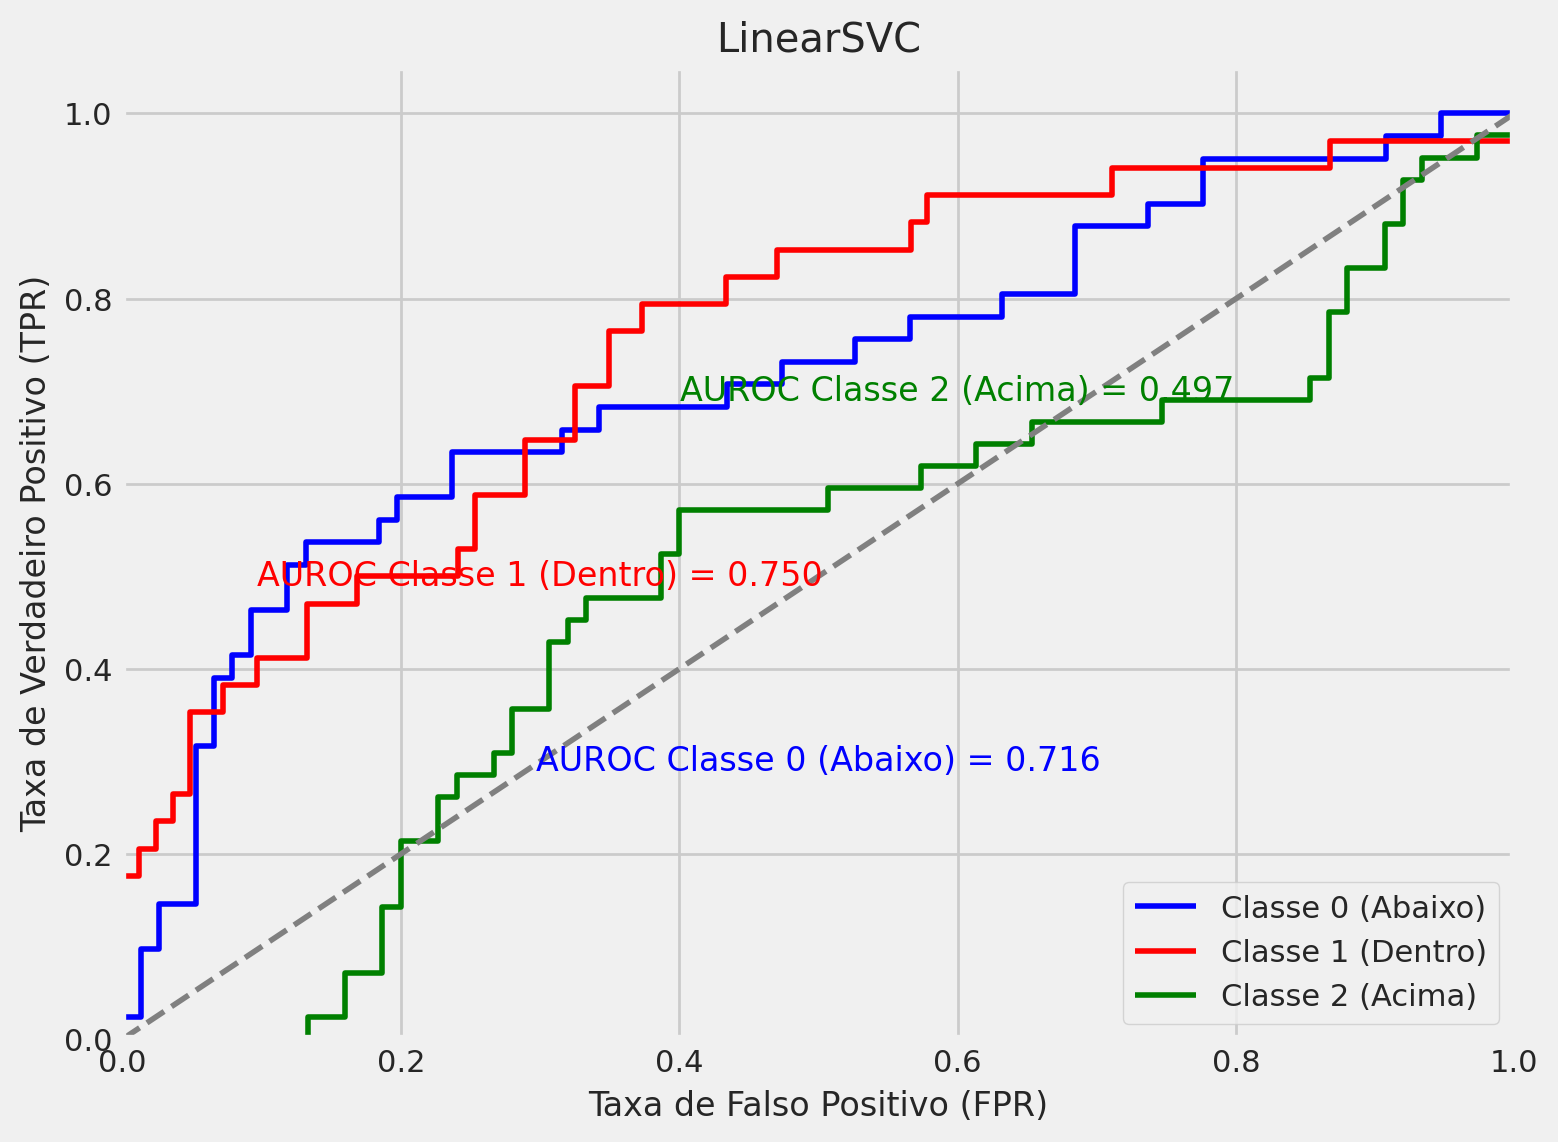

In [761]:
from sklearn.metrics import roc_curve, auc

# obtendo os valores de decisão do modelo
y_score = model.decision_function(X_test)

# calculando a curva AUROC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('LinearSVC')
plt.legend(loc="lower right")

# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()



In [762]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# create a support vector classifier object
svc = SVC()

# define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma': ['scale', 'auto']}

# create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.46902310684053994


#### LGBMClassifier 

In [731]:
import lightgbm as lgb

model = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=42)

# treinando o modelo
model.fit(X_train, y_train)

# fazendo as previsões
y_pred = model.predict(X_test)

# avaliando o modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.41      0.43        41
           1       0.53      0.56      0.54        34
           2       0.47      0.48      0.47        42

    accuracy                           0.48       117
   macro avg       0.48      0.48      0.48       117
weighted avg       0.48      0.48      0.48       117



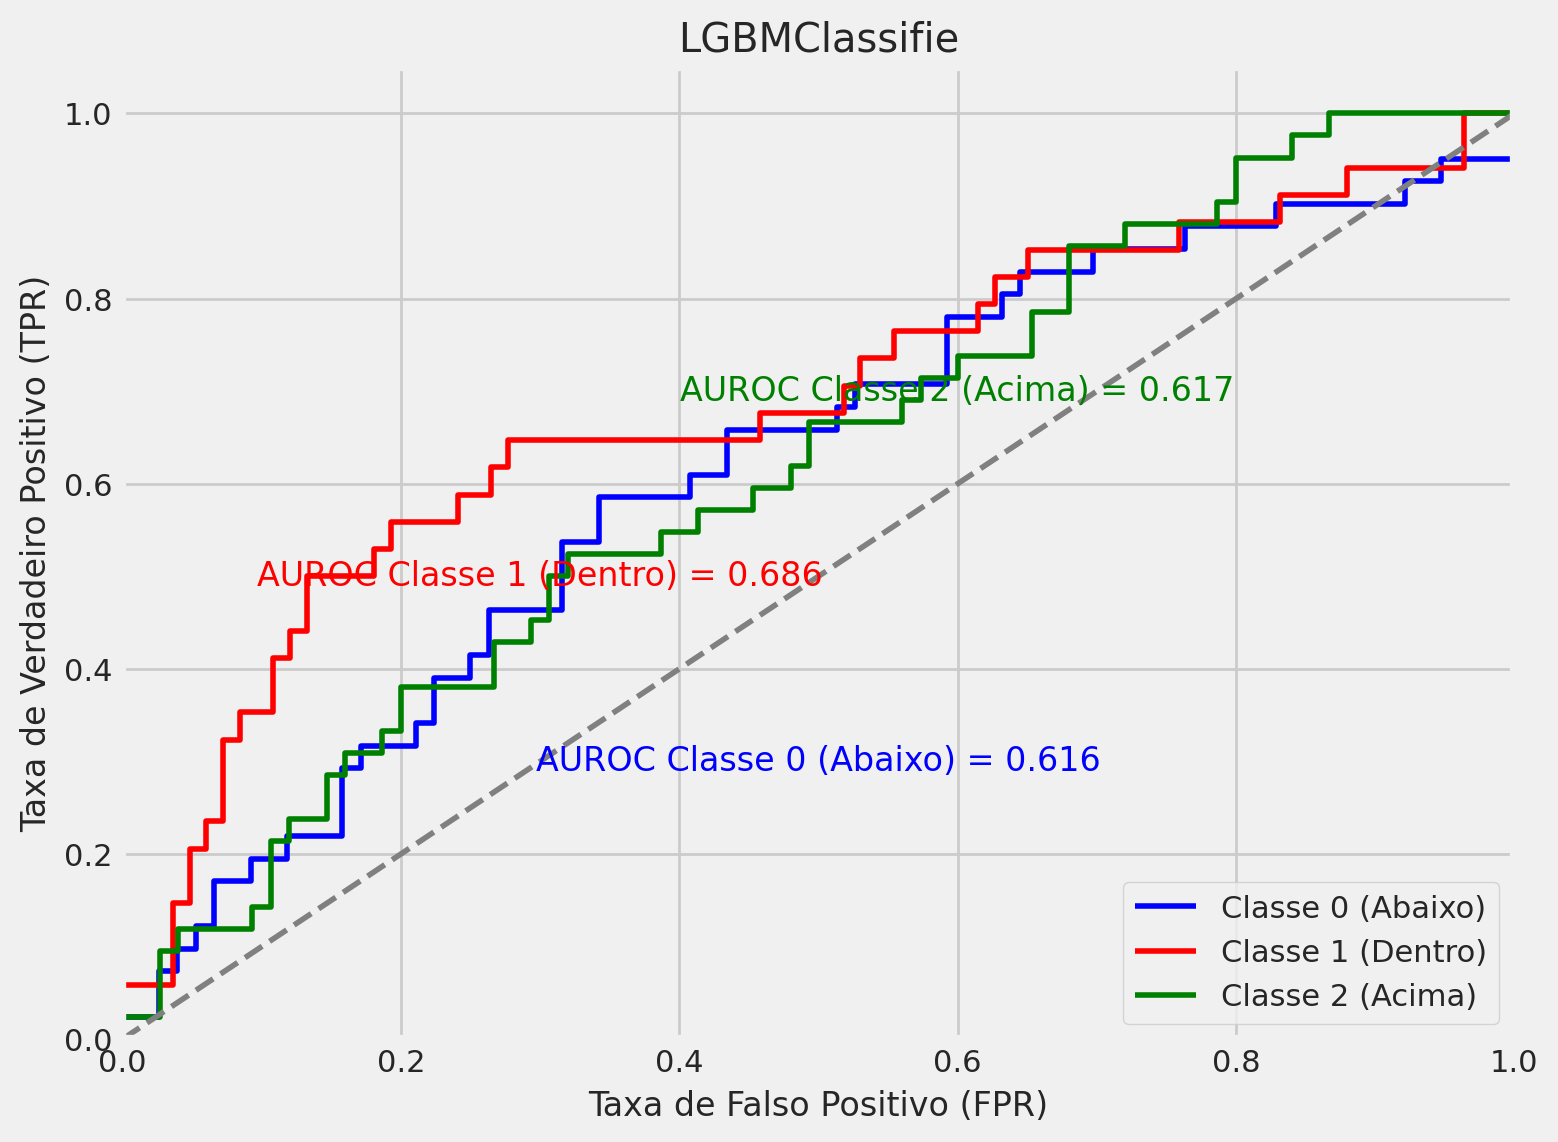

In [732]:
from sklearn.metrics import roc_curve, auc
# calculando a curva AUROC
y_prob = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('LGBMClassifie')
plt.legend(loc="lower right")

# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()


#### XGBOOST

In [733]:
import xgboost as xgb
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# treinando o modelo
model.fit(X_train, y_train)

# fazendo as previsões
y_pred = model.predict(X_test)

# avaliando o modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.41      0.43        41
           1       0.45      0.50      0.47        34
           2       0.49      0.48      0.48        42

    accuracy                           0.46       117
   macro avg       0.46      0.46      0.46       117
weighted avg       0.46      0.46      0.46       117



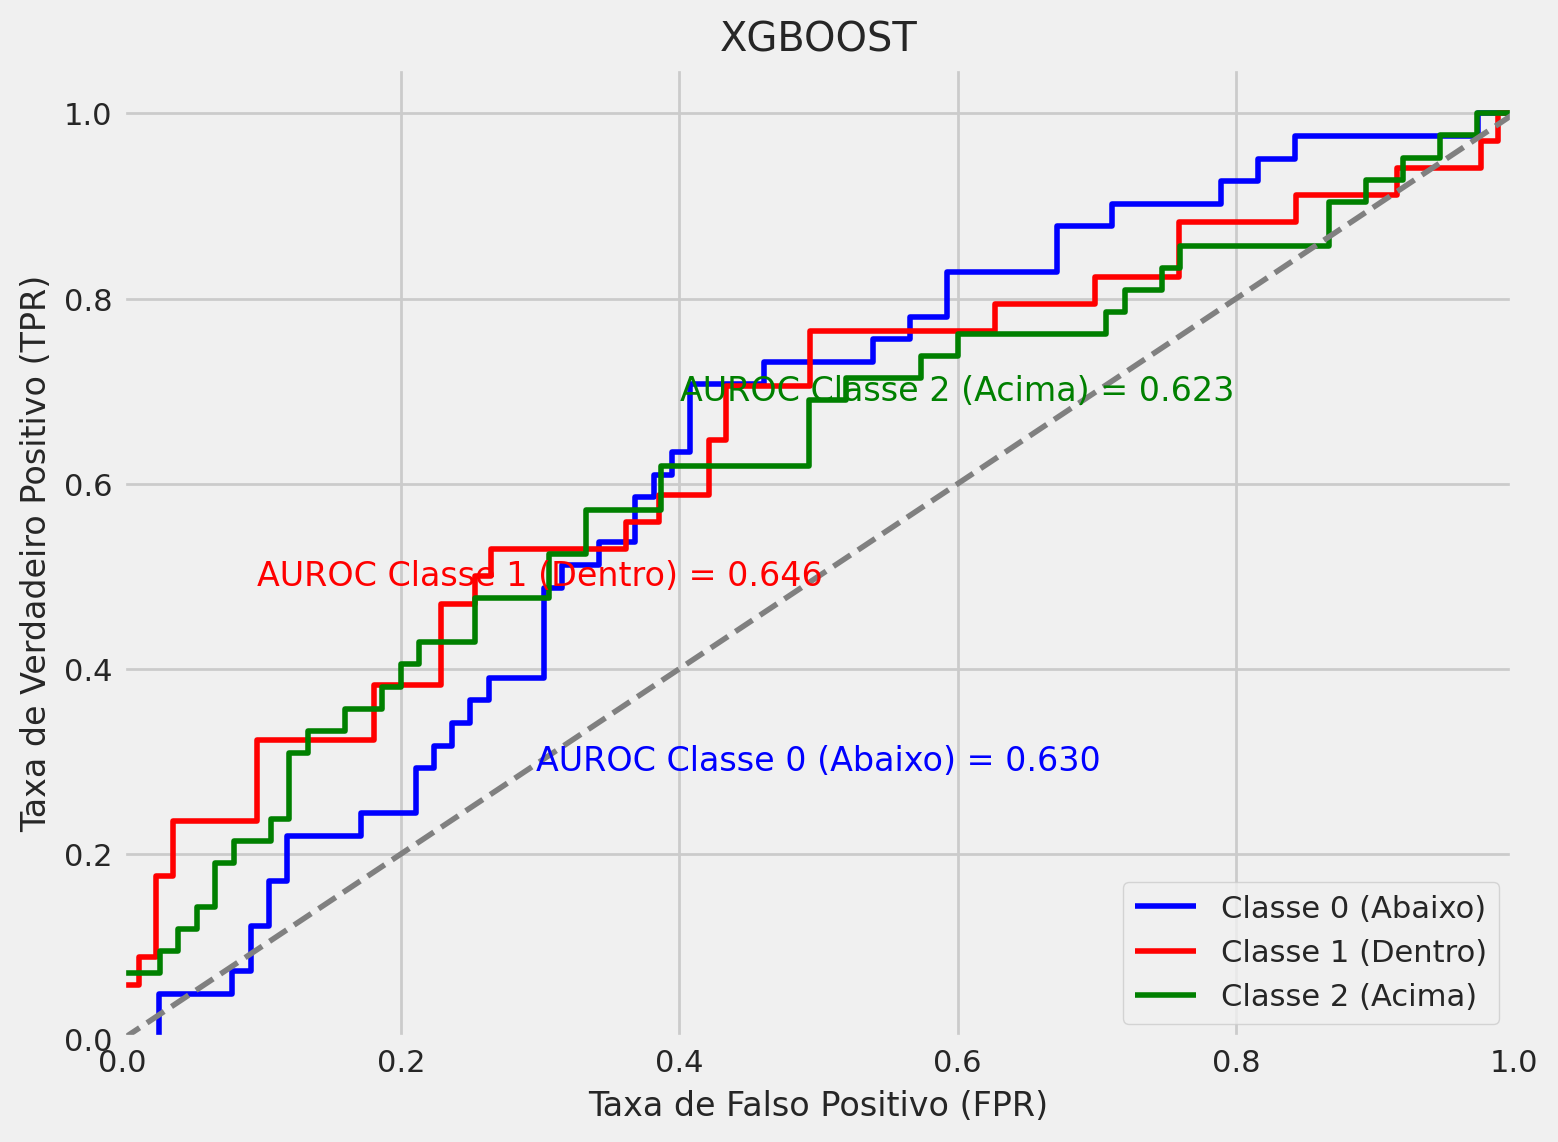

In [734]:
from sklearn.metrics import roc_curve, auc
# calculando a curva AUROC
y_prob = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('XGBOOST')
plt.legend(loc="lower right")

# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()

#### LogisticRegression

In [735]:
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# avaliando o modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.45      0.41      0.43        41
           1       0.45      0.50      0.47        34
           2       0.49      0.48      0.48        42

    accuracy                           0.46       117
   macro avg       0.46      0.46      0.46       117
weighted avg       0.46      0.46      0.46       117



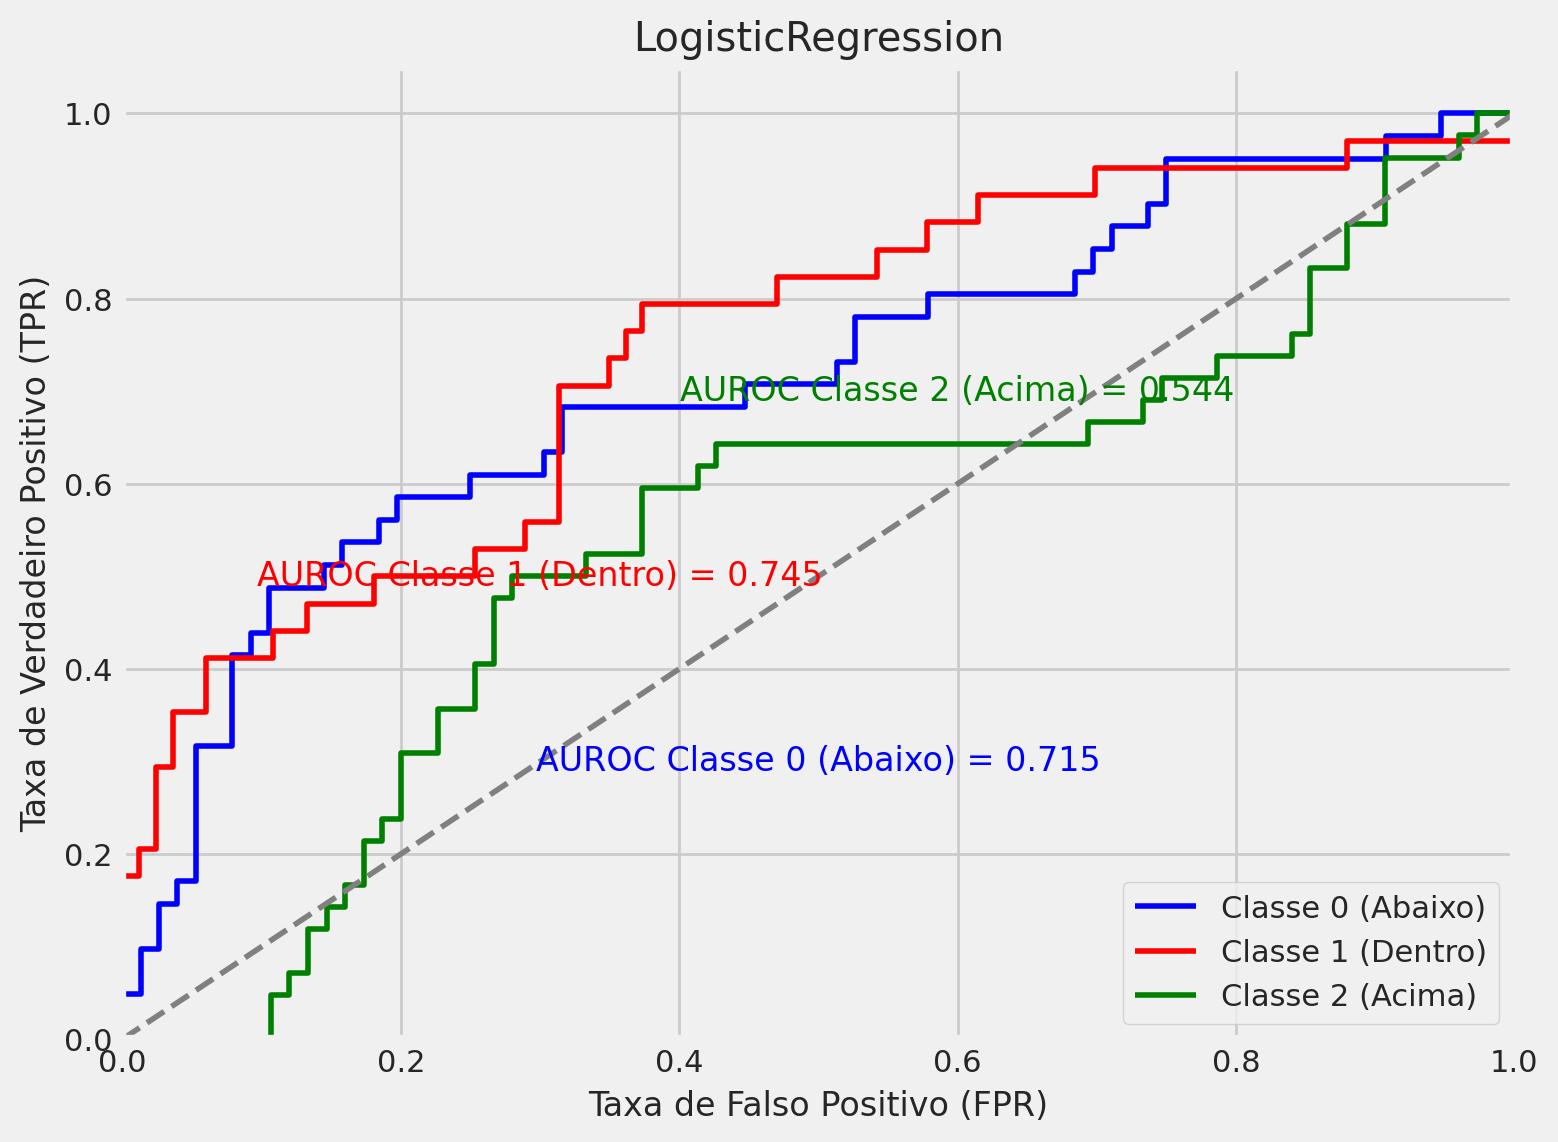

In [736]:
# Calculando a curva AUROC
y_prob = model.predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('LogisticRegression')
plt.legend(loc="lower right")


# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()

####  Seleção de Variáveis - BORUTA

In [737]:
!pip install boruta

In [738]:
from boruta import BorutaPy
from lightgbm import LGBMClassifier
import numpy as np

# criando estimador para o Boruta
lgbm = LGBMClassifier(
   n_jobs = -1,
   max_depth = 5
)

boruta = BorutaPy(
   estimator = lgbm, 
   n_estimators = 'auto',
   max_iter = 100 # número de tentativas a serem realizadas
)

# parametrizando para o conjunto de treino
boruta.fit(np.array(X_train), np.array(y_train))

# resultados
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features na área verde:', green_area)
print('features na área azul:', blue_area)

features na área verde: ['a_pesoat', 'imc']
features na área azul: []


#### Retreinamento do modelos apos Boruta 

In [739]:
!pip install boruta

In [740]:
from boruta import BorutaPy
from lightgbm import LGBMClassifier
import numpy as np

# creating the estimator for Boruta
lgbm = LGBMClassifier(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = lgbm, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)

# fitting to the training set
boruta.fit(np.array(X_train), np.array(y_train))

# results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['a_pesoat', 'imc']
features in the blue area: []


In [741]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['a_pesoat', 'imc']]

X_test_boruta = X_test[['a_pesoat', 'imc']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)


Shape sem boruta (467, 24) (117, 24)
Shape com boruta (467, 2) (117, 2)


#### LGBM com Boruta

In [742]:
#LGBM
clf_lgbm_boruta = LGBMClassifier()
clf_lgbm_boruta.fit(X_train_boruta, y_train)

y_pred_lgbm_boruta = clf_lgbm_boruta.predict(X_test_boruta)
prob_pos_lgbm_boruta = clf_lgbm_boruta.predict_proba(X_test_boruta)[:,1]

print('LGBM Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lgbm_boruta)))


print(classification_report(y_test, y_pred_lgbm_boruta))

LGBM Model
Accuracy: 0.4188
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        41
           1       0.43      0.53      0.47        34
           2       0.38      0.31      0.34        42

    accuracy                           0.42       117
   macro avg       0.42      0.43      0.42       117
weighted avg       0.42      0.42      0.41       117



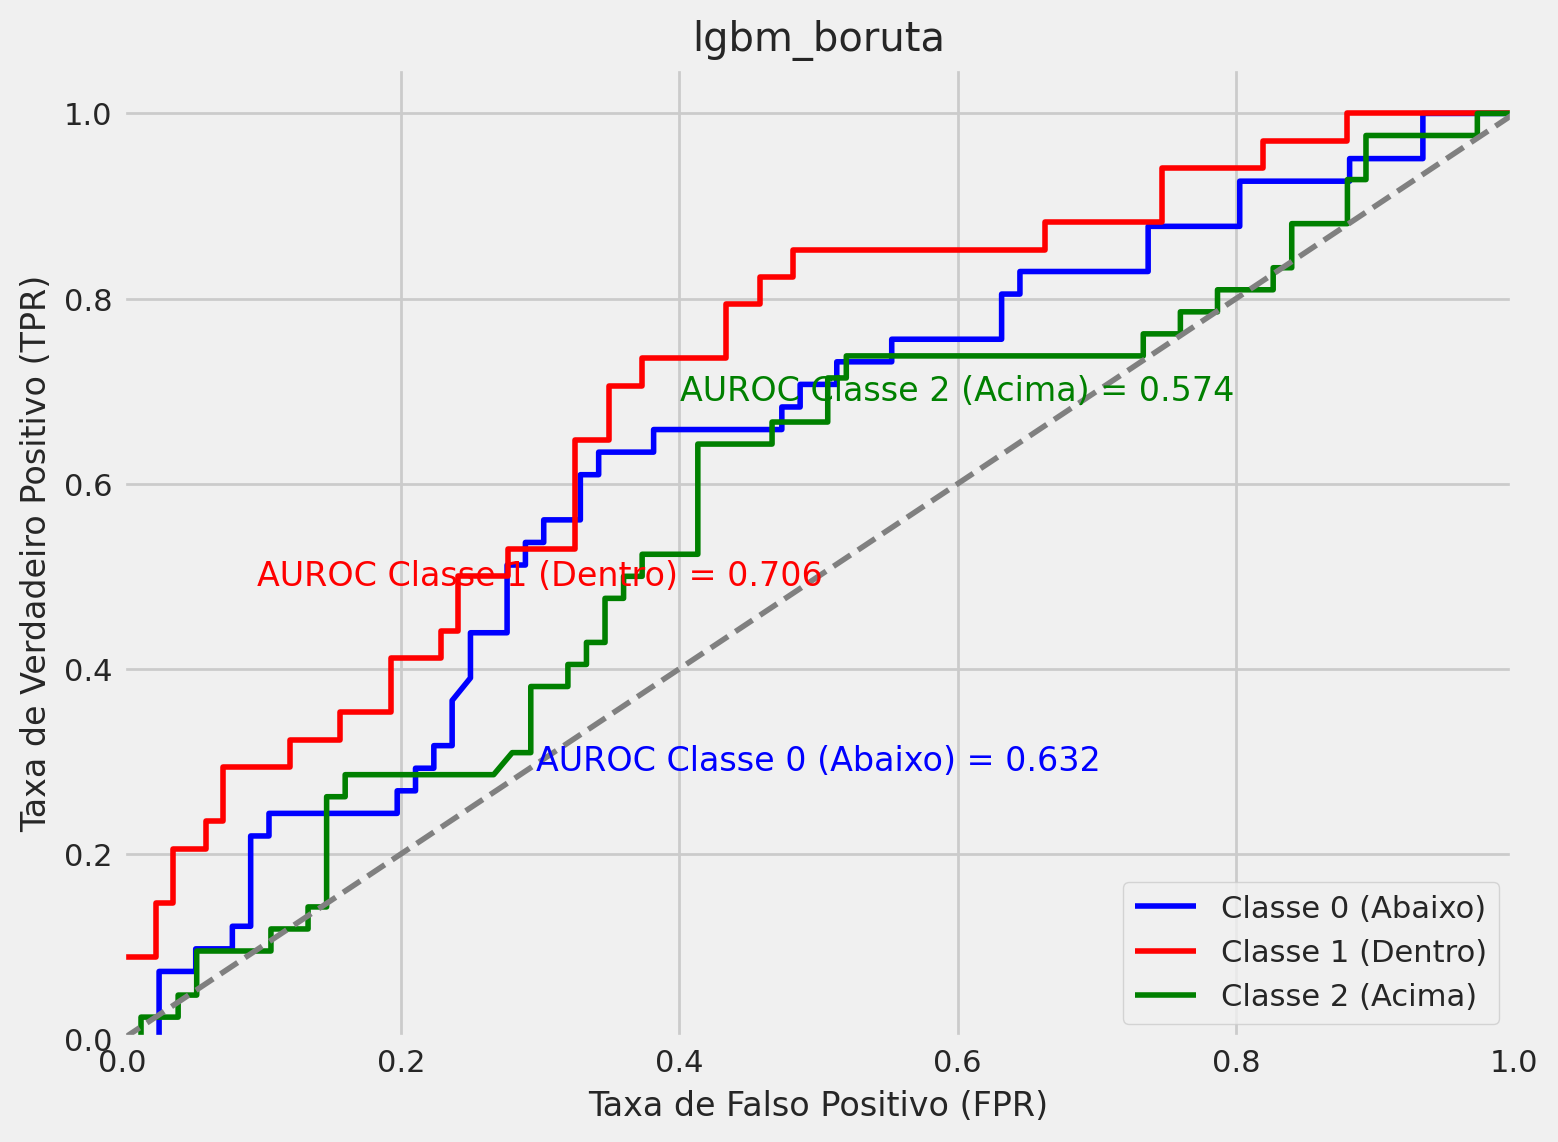

In [743]:
# Calculando a curva AUROC
y_prob = clf_lgbm_boruta.predict_proba(X_test_boruta)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('lgbm_boruta')
plt.legend(loc="lower right")


# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()

####  Xgboost com Boruta

In [744]:
# xgboost
clf_xgboost_boruta = xgb.XGBClassifier()
clf_xgboost_boruta.fit(X_train_boruta, y_train)

y_pred_xgboost_boruta = clf_xgboost_boruta.predict(X_test_boruta)
prob_pos_xgboost_boruta = clf_xgboost_boruta.predict_proba(X_test_boruta)[:,1]

print('XGBoost Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_xgboost_boruta)))


print(classification_report(y_test, y_pred_xgboost_boruta))


XGBoost Model
Accuracy: 0.4872
              precision    recall  f1-score   support

           0       0.52      0.54      0.53        41
           1       0.45      0.53      0.49        34
           2       0.49      0.40      0.44        42

    accuracy                           0.49       117
   macro avg       0.49      0.49      0.49       117
weighted avg       0.49      0.49      0.49       117



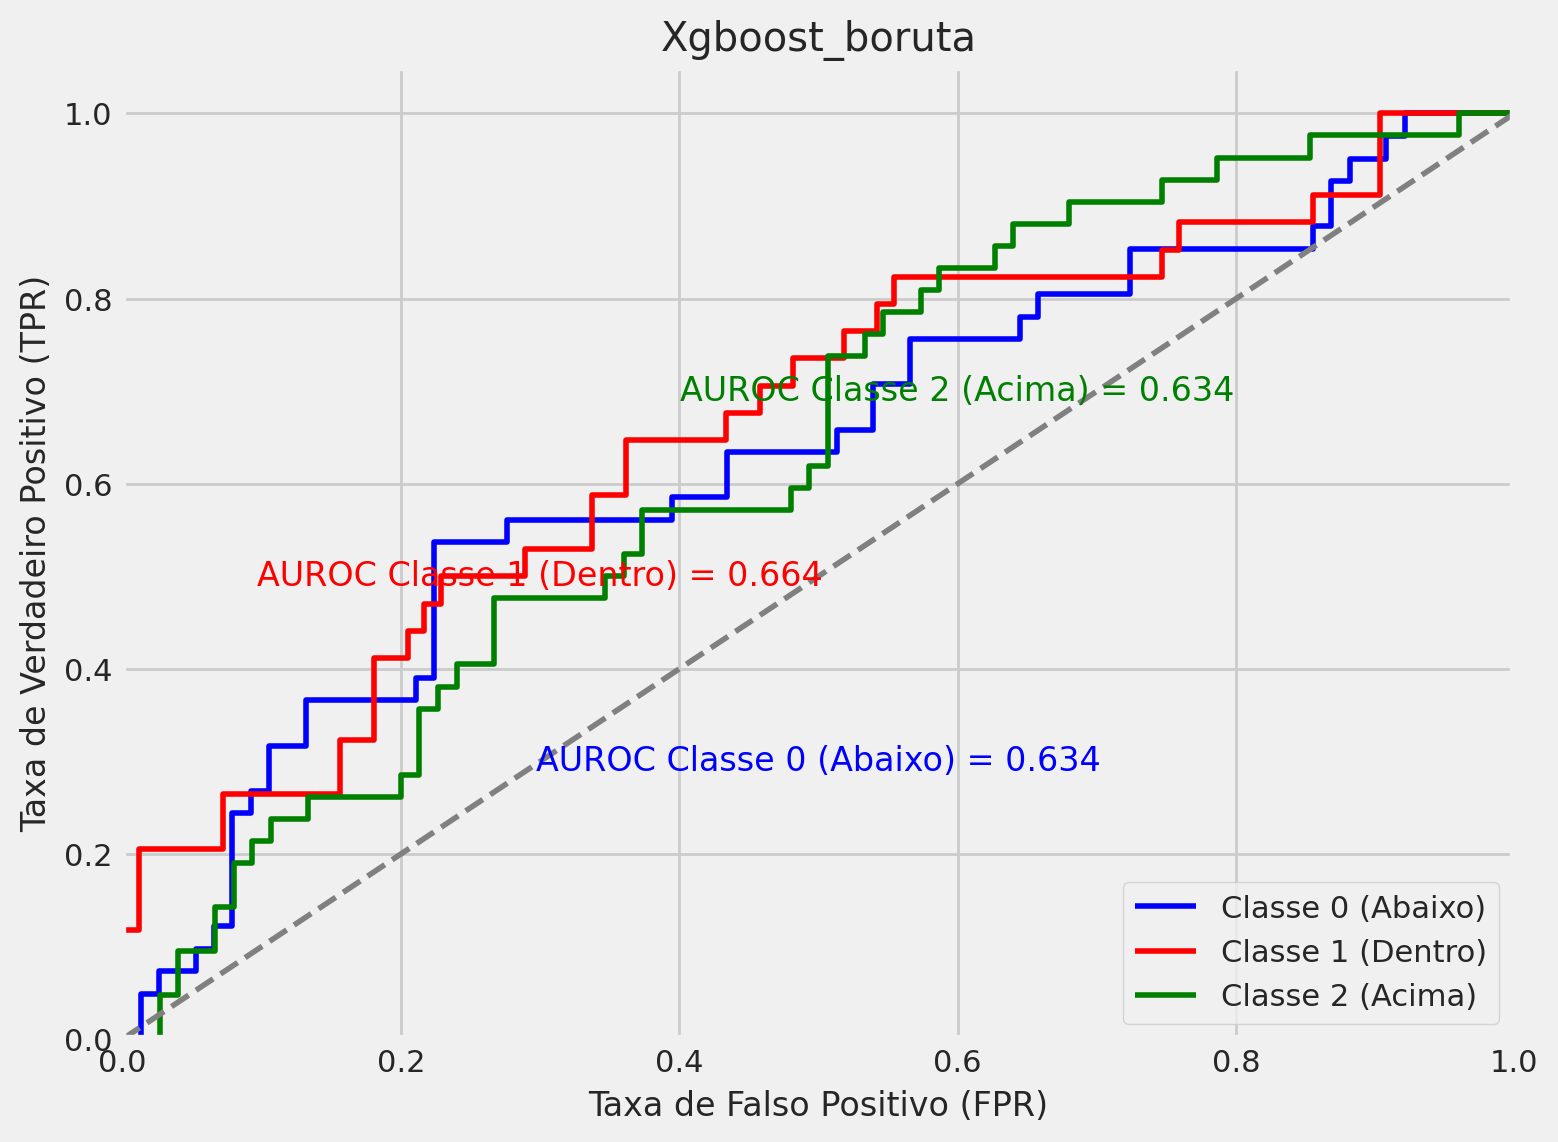

In [745]:
# Calculando a curva AUROC
y_prob = clf_xgboost_boruta.predict_proba(X_test_boruta)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Xgboost_boruta')
plt.legend(loc="lower right")


# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()

####  Logistic regression com Boruta

In [746]:
# logistic regression
clf_lr_boruta = LogisticRegression()
clf_lr_boruta.fit(X_train_boruta, y_train)

y_pred_lr_boruta = clf_lr_boruta.predict(X_test_boruta)
prob_pos_lr_boruta = clf_lr_boruta.predict_proba(X_test_boruta)[:,1]

print('Logistic Regression Model')
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_lr_boruta)))


print(classification_report(y_test, y_pred_lr_boruta))

Logistic Regression Model
Accuracy: 0.4444
              precision    recall  f1-score   support

           0       0.44      0.61      0.51        41
           1       0.49      0.53      0.51        34
           2       0.39      0.21      0.28        42

    accuracy                           0.44       117
   macro avg       0.44      0.45      0.43       117
weighted avg       0.44      0.44      0.43       117



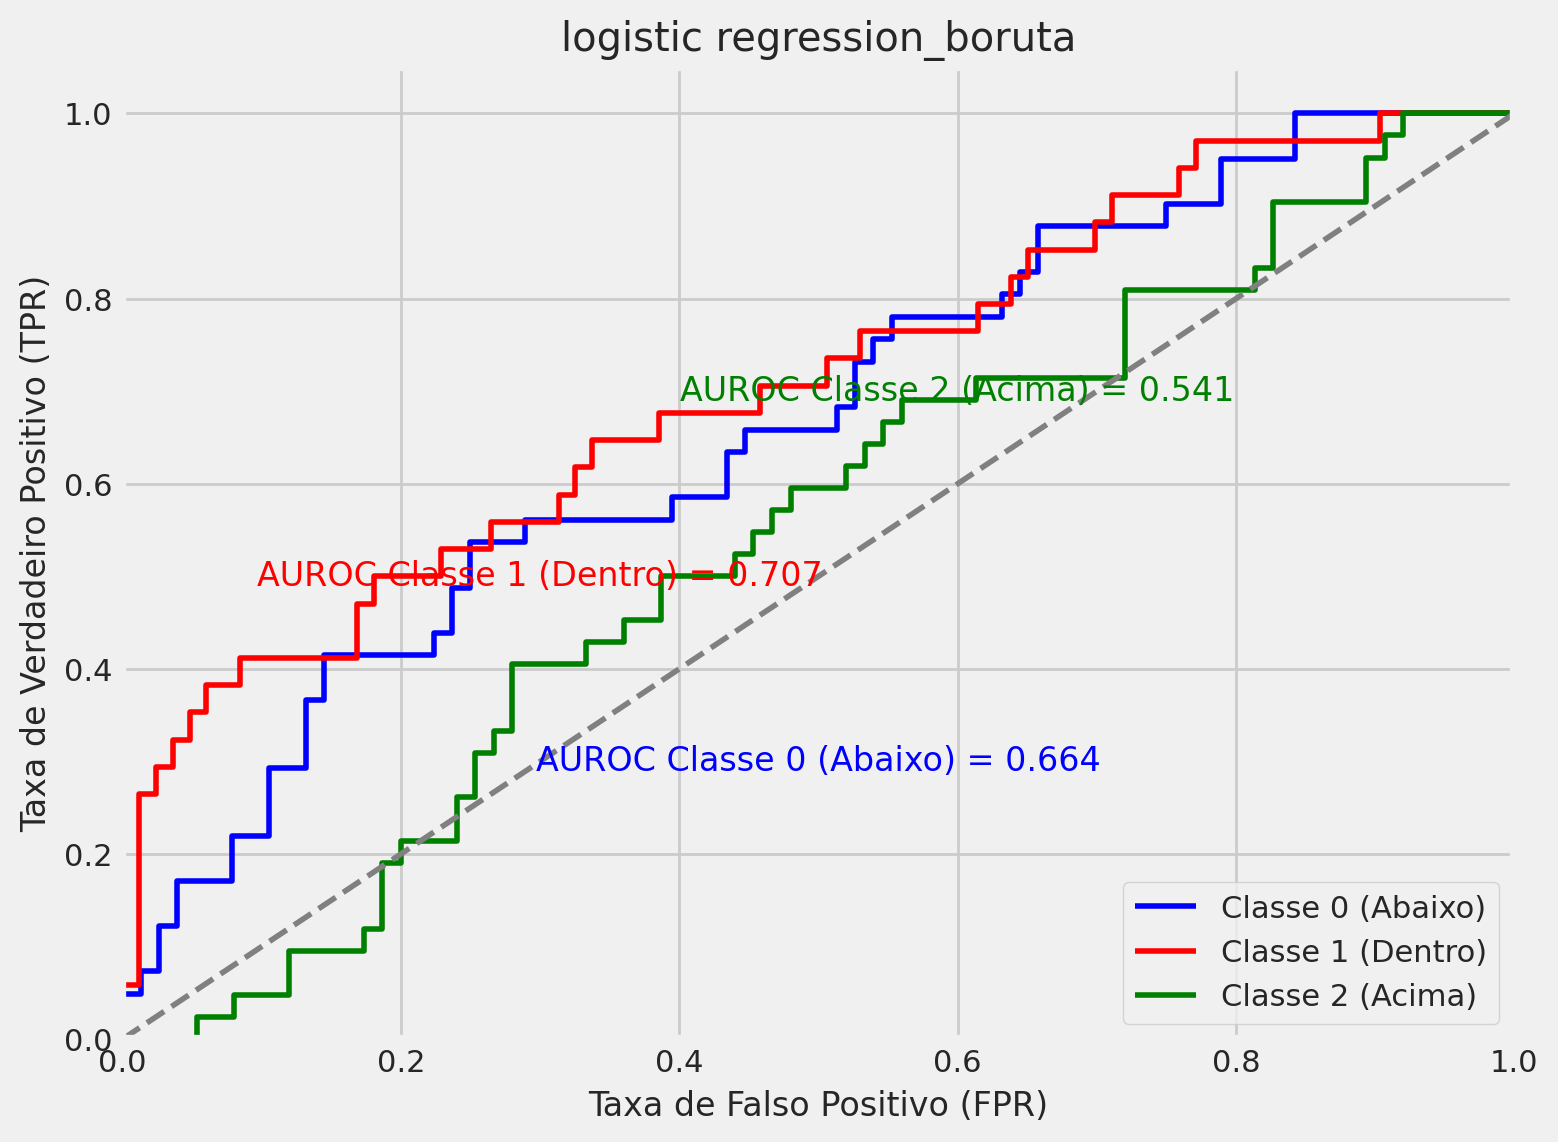

In [747]:
# Calculando a curva AUROC
y_prob = clf_lr_boruta.predict_proba(X_test_boruta)
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando a curva AUROC
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], color='blue', lw=2, label='Classe 0 (Abaixo)')
plt.plot(fpr[1], tpr[1], color='red', lw=2, label='Classe 1 (Dentro)')
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Classe 2 (Acima)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('logistic regression_boruta')
plt.legend(loc="lower right")


# adicionando os valores de AUROC no gráfico
plt.text(0.5, 0.3, "AUROC Classe 0 (Abaixo) = {:.3f}".format(roc_auc[0]), ha='center', va='center', size=12, color='blue')
plt.text(0.3, 0.5, "AUROC Classe 1 (Dentro) = {:.3f}".format(roc_auc[1]), ha='center', va='center', size=12, color='red')
plt.text(0.6, 0.7, "AUROC Classe 2 (Acima) = {:.3f}".format(roc_auc[2]), ha='center', va='center', size=12, color='green')

plt.show()

#### Importancia das variaveis pelo Shapley

In [748]:
!pip install shap
import shap

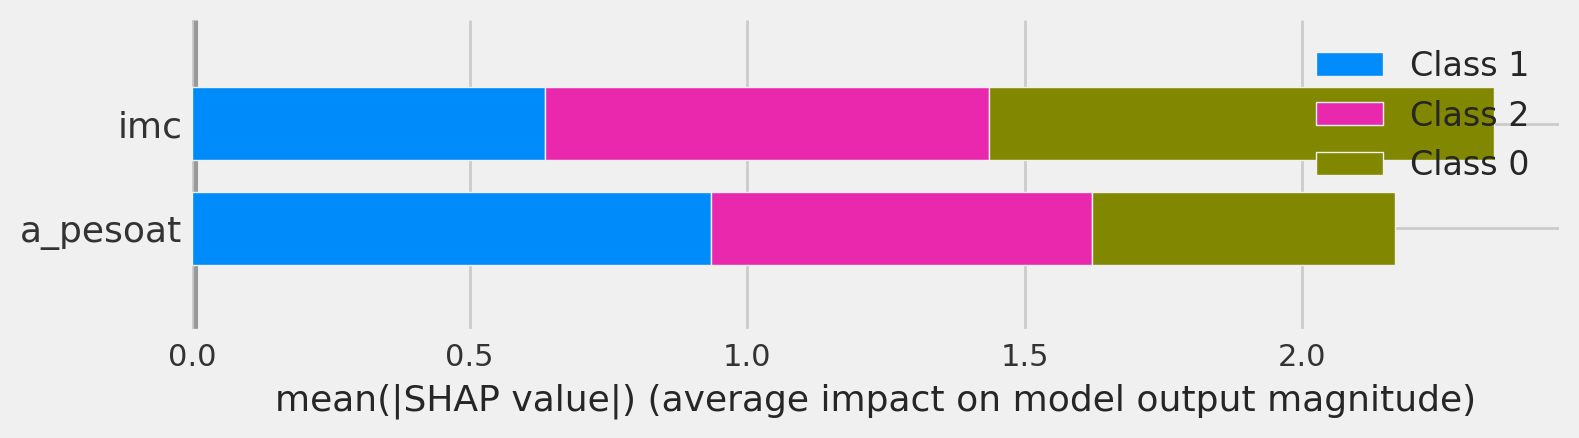

In [749]:
# resultados no teste
shap_values_test = shap.TreeExplainer(clf_xgboost_boruta).shap_values(X_test_boruta)
shap.summary_plot(shap_values_test, X_test_boruta, plot_type="bar")